In [1]:
import skimage.io
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
import time
# import imagecodecs
import imageio
from PIL import Image
from scipy import ndimage
import matplotlib.patches as patches # for drawing the rectangles on the field image

# read image for potato June 22, 2020
root_folder = "E:/data/remote_sensing/2020/"
project_stub = "Bean_Othello_Jul21_M10_transparent_reflectance"

# # read image for potato July 21, 2020
# root_folder = "E:/data/remote_sensing/2020/"
# project_stub = "Potato_Fertilizer_Othello_Jul21_M10_transparent_reflectance"


def convert_float_to_int(file_path):


    float_image = cv.imread(file_path, cv.IMREAD_UNCHANGED)
    print(np.min(float_image), np.max(float_image))
    image = np.array(float_image * 255., dtype=np.uint8)
    print(np.min(image), np.max(image))

    return image


-10000.0 0.1577283
0 40
-10000.0 0.13167298
0 33
-10000.0 0.18540289
1 47
-10000.0 0.188608
1 48
-10000.0 0.31917682
0 81
-10000.0 0.27858284
1 71
-10000.0 0.5841308
5 148
-10000.0 0.35694486
4 91
-10000.0 0.36221012
3 92
-10000.0 0.46651104
4 118
(4650, 6622, 10)


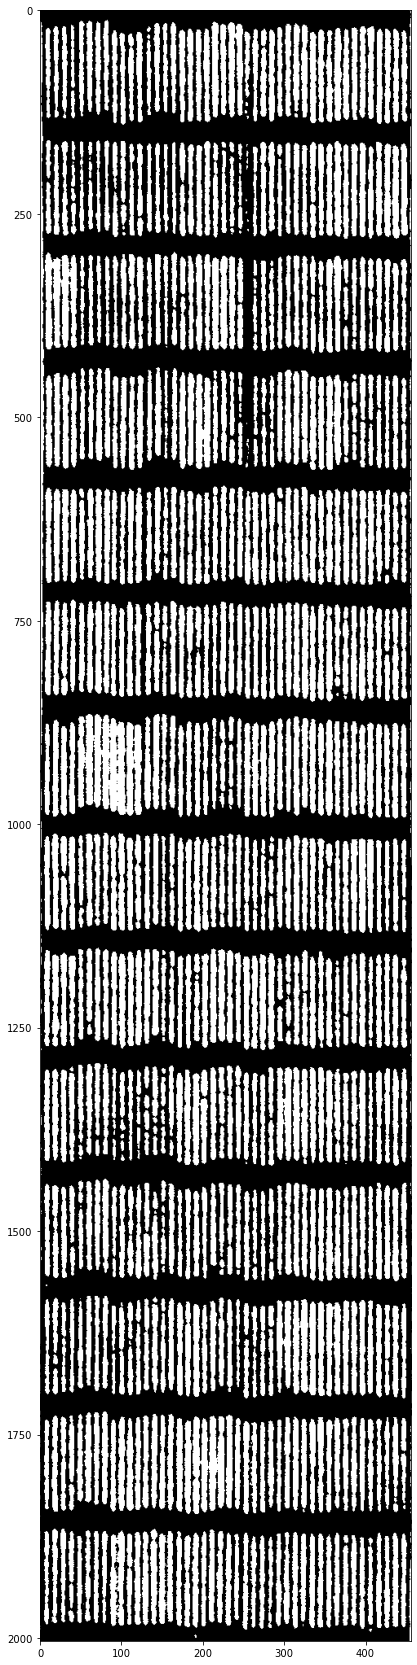

In [2]:
# import all the wavelengths
blue = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_blue.tif")
blue_444 = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_blue-444.tif")
green = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_green.tif")
green_531 = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_green-531.tif")
red = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_red.tif")
red_650 = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_red-650.tif")
nir = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_nir.tif")
red_edge = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_red edge.tif")
red_edge_705 = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_red edge-705.tif")
red_edge_740 = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_red edge-740.tif")


# create a hypercube
channels = [blue, blue_444, green, green_531, red, red_650, nir, red_edge, red_edge_705, red_edge_740]
hyperspec = np.zeros(shape=(blue.shape[0], blue.shape[1], len(channels)))

for i in range(0, len(channels)):
    hyperspec[:,:,i] = channels[i]
    
print(hyperspec.shape)

# import field image, region of interest
img = hyperspec[100:4500, 800:1800, :]

# rotate
img_rot = ndimage.rotate(img, angle = 1)

# crop to rows, columns
img_crop = img_rot[1543:3547, 250:706, :]

# calculate NDVI, threshold and apply as a mask to img_crop
red_crop = img_crop[:,:,5]
nir_crop = img_crop[:,:,7]
ndvi = (nir_crop - red_crop)/(nir_crop + red_crop)
ndvi_mask = np.where(ndvi>0.3, 1, 0)

plt.figure(figsize = (8,30))
plt.imshow(ndvi_mask, cmap="gray")
plt.savefig('ndvi_mask.png')

# img_masked = np.zeros(shape=img_crop.shape)

# # apply the mask to the cropped image and then use that for further work
# for band in range(0, 10):
#     img_masked[:,:,band] = img_crop[:,:,band] * ndvi_mask

# # plot a channel to check it out
# plt.imshow(img_masked[:,:, 4], cmap="gray")
# print(img_masked.shape)

True

plot_width: 41, plot_height: 143
(2004, 456, 100) is the img_indices shape
<bound method NDFrame.head of     plot_id       coords trial_name         line  rep  row  column  em   hm  \
0       153      (0, 43)     OT2008  PT16-23-8-B    3   14       2   1   99   
1       152      (0, 84)     OT2008  PT16-23-6-B    3   14       3   1   97   
2       151     (0, 125)     OT2008        Lumen    3   14       4   3  100   
3       150     (0, 166)     OT2008      PT20-16    3   14       5   1   97   
4       149     (0, 207)     OT2008      PT20-13    3   14       6   1   99   
..      ...          ...        ...          ...  ...  ...     ...  ..  ...   
148       7  (1859, 248)     OT2008       PT16-7    1    1       7   2   92   
149       8  (1859, 289)     OT2008  PT16-23-6-B    1    1       8   1   95   
150       9  (1859, 330)     OT2008  PT16-23-8-B    1    1       9   1   97   
151      10  (1859, 371)     OT2008      PT16-37    1    1      10   1  101   
152      11  (1859, 412)  

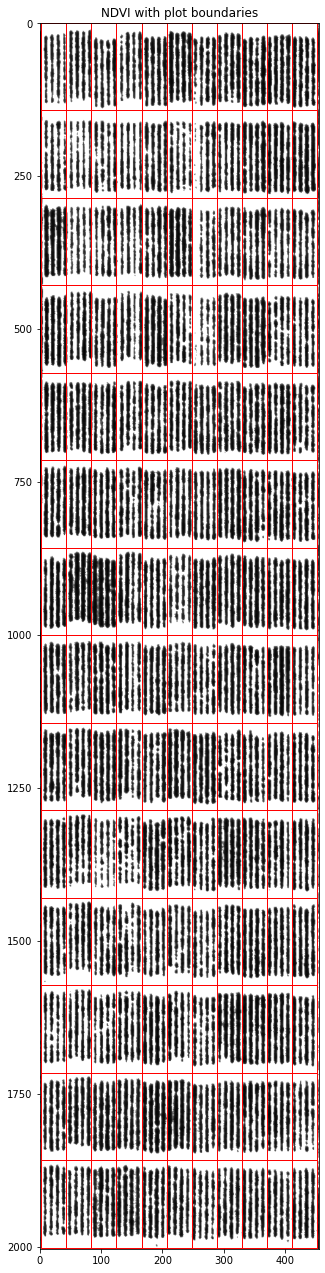

In [13]:
# define some variable
start_time = time.time()

# working field image
field_image = img_crop


field_y, field_x, _ = field_image.shape
plot_row = 14
plot_col = 11
plot_width = int(field_x / plot_col)
plot_height = int(field_y / plot_row)
xy_begin = (0, 2)
print(f"plot_width: {plot_width}, plot_height: {plot_height}")


channel_dict = {'blue': 0, 'blue_444': 1, 'green': 2, 'green_531': 3, 'red': 4, 'red_650': 5, 'nir': 6, 'red_edge': 7, 'red_edge_705': 8, 'red_edge_740': 9}

indices = []

for i, v in channel_dict.items():
    current_channel = channel_dict[i]
    for j, b in channel_dict.items():
        index_combo = (current_channel, channel_dict[j])
        if index_combo not in indices and (index_combo[1] - index_combo[0] != 0):
            indices.append((current_channel, channel_dict[j]))
        
    
# import the plot map
import pandas as pd
# E:\data\remote_sensing\2020\Bean_Othello_Jul21_M10_transparent_reflectance
plot_map = pd.read_csv("E:/data/remote_sensing/2020/Bean_Othello_Jul21_M10_transparent_reflectance/Bean_Othello_Jul21_M10_plotmap.csv")

# # import the ground truth data
ground_truth = pd.read_csv("E:/data/remote_sensing/2020/Bean_Othello_Jul21_M10_transparent_reflectance/Bean_Othello_Jul21_M10_groundtruth.csv")

# pandas, first number is row counting from above, second number is column
# print(plot_map.iloc[1, 0])
# print("plot width: ", plot_width, "plot_height: ", plot_height)
# print("xy_begin", xy_begin)

# find the center points of our plots
current_point = xy_begin

# create our plot index
plot_index = 0
df = pd.DataFrame(columns=['plot_id', 'coords'])

# create all our indices
# img_masked
img_indices = np.zeros(shape=(field_image.shape[0], field_image.shape[1], 100))
print(img_indices.shape, "is the img_indices shape")


# # calculate the indices and store them in the img_indices
for i, idx in enumerate(indices):     
    # choose bands
    band1 = field_image[:, :, idx[0]]
    band2 = field_image[:, :, idx[1]]
    
    # calculate the index
    current_index = np.divide(np.subtract(band1, band2), np.add(band1, band2))
    
    # mask the index
    img_indices[:,:, i] = np.multiply(current_index, ndvi_mask)
    
# calculate all of the plot id and plot origin points, and add them to our data frame
for row in range(0, plot_row):
    for col in range(0, plot_col):
            # plot_id for merging later, get from plot map document
            plot_id = plot_map.iloc[row, col + 1]
            plot_index += 1
            
            # find the upper left origin
            current_point = (xy_begin[0] + row * plot_height, xy_begin[1] + col * plot_width)

            # add this to the dataframe
            df = df.append({'plot_id': plot_id,'coords': current_point},ignore_index=True)
    
# # plot ndvi to check that our indices work and that our plots are correct
# define field image and subplots
img = img_indices[:,:,50]
figure, ax = plt.subplots(1, figsize=(5,30))

# Displays an image
ax.imshow(img, cmap="gray")
# ax.set_xlabel('time (s)')
ax.set_title('NDVI with plot boundaries')

# ax.set_ylabel('Undamped')

# add rectangle patches to image
for coord in df['coords']:
    rect = patches.Rectangle((coord[1],coord[0]),plot_width,plot_height, edgecolor='r', facecolor="none")
    ax.add_patch(rect)



    
    
plt.savefig("plot_map_boundaries.png")    

    
    
# populate the data frame with some mean values of the plots at each index
# TODO figure out the whole extraction and saving data thing
#               # create the plot roi
#             roi_crop = img_indices[current_point[0]:current_point[0] + plot_height, 
#                                    current_point[1]:current_point[1]+plot_width, 
#                                    :]
            
            
# for i, index in enumerate(indices):
#     mean_plot_value = np.mean(roi_crop[:,:,i])
#     df = df.append({str(index): index,
#                     (str(index)+"_mean"): mean_plot_value
#                    }, ignore_index=True)

# 







            
            

# # # merge our extracted features to the ground truth data
df = pd.merge(df,ground_truth,on='plot_id')
print(df.head)
# # print("Time elapsed: ", time.time() - start_time)



In [17]:

my_dict = {'plot_id': df['plot_id']}

# iterate through all the indices

for i, index in enumerate(indices):
    plot_id = []
    mean_list = []
    median_list = []
    std_list = []
    min_list = []
    max_list = []
        
    # iterate through the set of coordinates, and select the region of interest to calculate parameters
    for j, coords in enumerate(df['coords']):
        
        roi = img_indices[coords[0]:coords[0] + plot_height, coords[1]:coords[1]+plot_width, i]
        roi_mask = ndvi_mask[coords[0]:coords[0] + plot_height, coords[1]:coords[1]+plot_width]
        print(f"roi.shape={roi.shape} and roi_mask.shape={roi_mask.shape}")
        
        pts = np.where(roi_mask == 1)
        roi_index_mean = roi[pts[0], pts[1]].mean()
        print(roi_index_mean)
    
        # mean intensity
        mean_list.append(roi_index_mean)
        
        # median intensity
        median_list.append(np.median(roi))
        
        # standard deviation
        std_list.append(np.std(roi)) 
        
        # min intensity
        min_list.append(np.min(roi))
        
        # max intensity
        max_list.append(np.max(roi))
        

    # add the index lists into dictionary
    my_dict[(str(i) + "_mean").strip()] = mean_list
#     my_dict[(str(i) + "_med").strip()] = median_list
#     my_dict[(str(i) + "_std").strip()] = std_list
#     my_dict[(str(i) + "_min").strip()] = min_list
#     my_dict[(str(i) + "_max").strip()] = max_list


# now take that dictionary, turn it into a data frame
df2 = pd.DataFrame.from_dict(my_dict)

# take all the columns in df2 and add them into our original data frame
for col in df2.columns:
    df[col] = df2[col]
    
# take a look at it
print(df.head)

# save it to disk
df.dropna().to_csv((project_stub + '_hyperindices.csv')).strip()



roi.shape=(143, 41) and roi_mask.shape=(143, 41)
0.055450651482119924
roi.shape=(143, 41) and roi_mask.shape=(143, 41)
0.058966636596005
roi.shape=(143, 41) and roi_mask.shape=(143, 41)
0.05963376102071335
roi.shape=(143, 41) and roi_mask.shape=(143, 41)
0.04962318140667429
roi.shape=(143, 41) and roi_mask.shape=(143, 41)
0.0477633716121905
roi.shape=(143, 41) and roi_mask.shape=(143, 41)
0.05052904118897353
roi.shape=(143, 41) and roi_mask.shape=(143, 41)
0.049355021343891824
roi.shape=(143, 41) and roi_mask.shape=(143, 41)
0.04505668215978459
roi.shape=(143, 41) and roi_mask.shape=(143, 41)
0.04866187041248629
roi.shape=(143, 41) and roi_mask.shape=(143, 41)
0.04005993929768035
roi.shape=(143, 41) and roi_mask.shape=(143, 41)
0.05901209899094384
roi.shape=(143, 41) and roi_mask.shape=(143, 41)
0.07436597001893568
roi.shape=(143, 41) and roi_mask.shape=(143, 41)
0.08186497931035885
roi.shape=(143, 41) and roi_mask.shape=(143, 41)
0.08400819981213932
roi.shape=(143, 41) and roi_mask.sh

AttributeError: 'NoneType' object has no attribute 'strip'